We'll use the diabetes built-in dataset which contains a set of predictive variables for predicting some quantitative measure of diabetes disease progression.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [ ]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['progression'] = pd.Series(data.target)

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# split data into X and y
y = df['progression']
X = df.drop('progression',axis=1)

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# get training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# get predictions on the test set
y_pred = model.predict(X_test)

# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 2900.193628493481


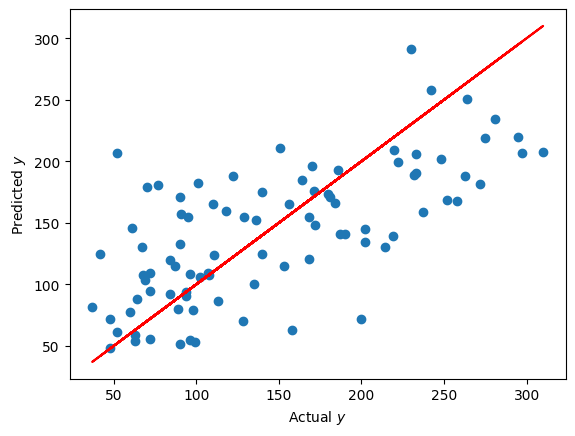

In [ ]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,"r") # perfect model line
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

### Our MLR model seems to have decent performance

## Object Serialisation

In [ ]:
## Saving a model with pickle
import pickle

# Save the model like we would a Python file
model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

This creates a portable model.pkl file in the specified file path which we can move between computers, email to others, use for model versioning, etc. We can also use this file to make predictions in the future.

### Restoring the model with Pickle

In [ ]:
# restore the model just like we would read a file
model_load_path = "mlr_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

In [ ]:
# get predictions from unpickled model
y_pred = unpickled_model.predict(X_test)

In [ ]:
# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 2900.193628493481


In [ ]:
# Load dataset
df= pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/Python/Crop_yield.csv")
df.head(5)

,Region,Temperature,Rainfall,Soil_Type,Fertilizer_Usage,Pesticide_Usage,Irrigation,Crop_Variety,Yield
0,East,23.152156,803.362573,Clayey,204.792011,20.767590,1,Variety B,40.316318
1,West,19.382419,571.567670,Sandy,256.201737,49.290242,0,Variety A,26.846639
2,North,27.895890,-8.699637,Loamy,222.202626,25.316121,0,Variety C,-0.323558
3,East,26.741361,897.426194,Loamy,187.984090,17.115362,0,Variety C,45.440871
4,East,19.090286,649.384694,Loamy,110.459549,24.068804,1,Variety B,35.478118


In [ ]:


# Define predictors and target variable
X = df[['Temperature', 'Rainfall', 'Fertilizer_Usage', 'Pesticide_Usage']]
y = df['Yield']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R-squared: {r2}")

Test MSE: 0.3346060708725867
Test R-squared: 0.9963871774411283


In [ ]:
#Define the path where the model will be saved.
model_save_path = 'crop_yield_model.pkl'

# Save the trained model to a file
with open(model_save_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_save_path}")

Model saved to crop_yield_model.pkl


In [ ]:
# A dictionary to store the new set of conditions
new_conditions = {
    'Temperature': [25],  # average temperature in °C
    'Rainfall': [150],  # total rainfall in mm
    'Fertilizer_Usage': [200],  # fertilizer used in kg per hectare
    'Pesticide_Usage': [30]  # pesticide used in litres per hectare
}

# Convert to DataFrame
new_conditions_df = pd.DataFrame(new_conditions)

# This is where the model is saved
model_load_path = 'crop_yield_model.pkl'

# Load the updated model
with open(model_load_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the model to predict the yield for the new conditions
predicted_yield = loaded_model.predict(new_conditions_df)

print(f"Predicted Yield for the new conditions: {predicted_yield[0]} tonnes per hectare")

Predicted Yield for the new conditions: 8.172860333818216 tonnes per hectare
